<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Python Course: Spring 2020

Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below.

In [1]:
NAME = "Robina Shaheen"
COLLABORATORS = ""

---

![Colored Bar](colored-bar.png)

## About the 2013 Colorado Floods

In the Earth Analytics bootcamp course last fall, you learned how to process time series data. You also learned how to write functions. You will use these skills in this assignment to process some data associated with the 2019 floods. Some of this data you may have already worked with last semester!

To begin, you should have already read some of the overview material in the intermediate earth analytics textbook about the 2019 Colorado Flood event. 


### Graded Activity
In the cell below, please add a concise paragraph that summarizes the following:

1. List 2 main drivers (causes) of the Colorado Floods. (5 points)
2. Describe 3 impacts of the floods on the region.  (5 Points)
*******************

1. Main drivers of the Colorado Floods :
    * Precipitation: On average, Colorado recives ~ 20  inches of rain in the form of rain, snow and hail through out the year. However, in early September 2013, a slow moving cold front moved through Colorado intersecting with a warm, humid front. The clash between the cold and warm fronts yielded heavy rain causing late summer flood. Due to the atmospheric conditions, the storm produced significant precipitation in short time (17 inches in just one week). A heavy rain coupled with the geogrpahy of the aera can caused devastating damages. For example, the storm that caused the 2013 Colorado flooding was kept in a confined area over the Eastern Range of the Rocky Mountains in Colorado by these water vapor systems.

    * River Discharge: Stream and river discharge is another ideal metric to quantify flow, which increases significantly during a flood event. The United States Geological Survey has a distributed network of aquatic sensors located in streams across the United States. On Sep. 13, 2013, Boulder creek flow surged to ~8400 CFS, according to the USGS sensors Network and this caused flash flood in the area. 
    In conclusion a combination of heavy rain fall in just few days and extreme water discharge at both the Boulder Creek and Fountain Creek in Sep. 2013 led to river overflow, killing 10 people and causing billion in damages.
    
2. Impact of the floods on the region.
    * Economic Impact:  Homes, businesses, and other infrastructure were damaged during Sep. 2013 flood event causing $4 billion in damages across 24 counties. 
    * Ecosystem Impact:  Changes in the river/stream path can brings major changes for aquatic organisms and terrestrial organisms. For example, crayfish lost their habitat during 2013 flood event. They used to live along the old stream bed which is bare and dry now. Similarly field vole, that used to have a burrow in dry land which is now new path of the St. Vrain River. 
    * Landscape Impact: People living in the house that is now on the west side of the river instead of the eastern bank have a completely different yard and driveway! 
    * Insurance hike: Catastrophic events like 2013 flood can lead to an increase in insurance price for businesses and home. It may also lead to decrased in property values in the flood basin.

![Colored Bar](colored-bar.png)

In [2]:
# Imports for autograding - do not edit!
import matplotcheck.base as mpc
import matplotcheck.timeseries as mts
# IMPORTANT: This cell will not run if you have matplotcheck version < 0.1 
# to update run conda install -c conda-forge matplotcheck --upgrade
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.raster as ra

In [3]:
# Import libraries here

# YOUR CODE HERE
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import numpy as np
import pandas as pd
import earthpy as et

# To handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

## Import and Process Precipitation Data (10 points)
Use pandas to open the file: `data/precipitation/805333-precip-daily-1948-2013.csv`. 
Use the file to do the following:

1. Create an object called `precip_hourly` that represents hourly precipitation.
2. Create an object called `precip_daily` that represents daily precipitation.
3. Create an object called `precip_monthly` that represents monthly precipitation.

For each data frame created above make sure the "Date" column is set as the index and is of `datetime`. Also be sure to handle importing no data values when you open the file. Use the `PRECIP_HLY_documentation.pdf` available in your data download to read more about this file and to access the metadata. 


In [4]:
# YOUR CODE HERE
# Define relative path to file using os.path.join

daily_precip_1948_2013 = os.path.join("data","colorado-flood","precipitation",
                                      '805333-precip-daily-1948-2013.csv')
# To check if path is created

os.path.exists(daily_precip_1948_2013)

False

In [5]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
os.getcwd()

'C:\\Users\\bina_\\earth-analytics'

In [6]:
# Define relative path to file using os.path.join

daily_precip_1948_2013 = os.path.join("data","colorado-flood","precipitation",
                                      '805333-precip-daily-1948-2013.csv')
# To check if path is created

os.path.exists(daily_precip_1948_2013)

True

In [7]:
daily_precip_1948_2013= pd.read_csv('data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv')
daily_precip_1948_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480801 01:00,0.00,g,
1,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480802 15:00,0.05,,
2,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 09:00,0.01,,
3,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 14:00,0.03,,
4,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 15:00,0.03,,


In [8]:
daily_precip_1948_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14476 entries, 0 to 14475
Data columns (total 9 columns):
STATION             14476 non-null object
STATION_NAME        14476 non-null object
ELEVATION           14476 non-null object
LATITUDE            14476 non-null object
LONGITUDE           14476 non-null object
DATE                14476 non-null object
HPCP                14476 non-null float64
Measurement Flag    14476 non-null object
Quality Flag        14476 non-null object
dtypes: float64(1), object(8)
memory usage: 1018.0+ KB


In [9]:
file_path1 = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805333-precip-daily-1948-2013.csv")

In [10]:
# To import csv file as a panda dataframe.
boulder_precip_1948_2013 = pd.read_csv(file_path1,
                                      parse_dates=['DATE'],
                                       index_col= ['DATE'],
                                       na_values=['999.99'])

# View first few rows
boulder_precip_1948_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,


In [44]:
boulder_precip_1948_2013

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.10,,


In [89]:
precip_1980= (boulder_precip_1948_2013['1980-01-01':'1980-12-30']
                       .resample('H').sum())
precip_1980

,HPCP
DATE,
1980-01-01 01:00:00,0.0
1980-01-01 02:00:00,0.0
1980-01-01 03:00:00,0.0
1980-01-01 04:00:00,0.0
1980-01-01 05:00:00,0.0
...,...
1980-12-24 08:00:00,0.0
1980-12-24 09:00:00,0.0
1980-12-24 10:00:00,0.0


In [90]:
precip_1980.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8604 entries, 1980-01-01 01:00:00 to 1980-12-24 12:00:00
Freq: H
Data columns (total 1 columns):
HPCP    8604 non-null float64
dtypes: float64(1)
memory usage: 134.4 KB


In [88]:
precip_1950= (boulder_precip_1948_2013['1950-01-01':'1950-12-30']
                       .resample('H').sum())
precip_1950.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8390 entries, 1950-01-01 01:00:00 to 1950-12-16 14:00:00
Freq: H
Data columns (total 1 columns):
HPCP    8390 non-null float64
dtypes: float64(1)
memory usage: 131.1 KB


In [81]:
data1= boulder_precip_1948_2013.dropna()
data2 = data1.reset_index(drop=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14075 entries, 0 to 14074
Data columns (total 8 columns):
STATION             14075 non-null object
STATION_NAME        14075 non-null object
ELEVATION           14075 non-null object
LATITUDE            14075 non-null object
LONGITUDE           14075 non-null object
HPCP                14075 non-null float64
Measurement Flag    14075 non-null object
Quality Flag        14075 non-null object
dtypes: float64(1), object(7)
memory usage: 879.8+ KB


In [78]:
df = data1.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 8 columns):
STATION             0 non-null float64
STATION_NAME        0 non-null float64
ELEVATION           0 non-null float64
LATITUDE            0 non-null float64
LONGITUDE           0 non-null float64
HPCP                0 non-null float64
Measurement Flag    0 non-null float64
Quality Flag        0 non-null float64
dtypes: float64(8)
memory usage: 0.0 bytes


In [79]:
data1 = boulder_precip_1948_2013[boulder_precip_1948_2013['HPCP'].notnull()]
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14075 entries, 1948-08-01 01:00:00 to 2013-12-23 02:00:00
Data columns (total 8 columns):
STATION             14075 non-null object
STATION_NAME        14075 non-null object
ELEVATION           14075 non-null object
LATITUDE            14075 non-null object
LONGITUDE           14075 non-null object
HPCP                14075 non-null float64
Measurement Flag    14075 non-null object
Quality Flag        14075 non-null object
dtypes: float64(1), object(7)
memory usage: 989.6+ KB


In [48]:
data = boulder_precip_1948_2013.dropna(subset=['HPCP'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14075 entries, 1948-08-01 01:00:00 to 2013-12-23 02:00:00
Data columns (total 8 columns):
STATION             14075 non-null object
STATION_NAME        14075 non-null object
ELEVATION           14075 non-null object
LATITUDE            14075 non-null object
LONGITUDE           14075 non-null object
HPCP                14075 non-null float64
Measurement Flag    14075 non-null object
Quality Flag        14075 non-null object
dtypes: float64(1), object(7)
memory usage: 989.6+ KB


In [30]:
boulder_precip_1948_2013.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14476 entries, 1948-08-01 01:00:00 to 2013-12-31 00:00:00
Data columns (total 8 columns):
STATION             14476 non-null object
STATION_NAME        14476 non-null object
ELEVATION           14476 non-null object
LATITUDE            14476 non-null object
LONGITUDE           14476 non-null object
HPCP                14075 non-null float64
Measurement Flag    14476 non-null object
Quality Flag        14476 non-null object
dtypes: float64(1), object(7)
memory usage: 1017.8+ KB


In [42]:
type(boulder_precip_1948_2013)
boulder_precip_1948_2013.to_csv("output.csv", index=False, header=False)

In [32]:
boulder_precip_1948_2013.describe()

,HPCP
count,14075.000000
mean,0.082716
std,0.115928
min,0.000000
25%,0.020000
50%,0.100000
75%,0.100000
max,2.720000


In [83]:
precip_hourly = (data1.resample('H').sum())
precip_hourly

,HPCP
DATE,
1948-08-01 01:00:00,0.0
1948-08-01 02:00:00,0.0
1948-08-01 03:00:00,0.0
1948-08-01 04:00:00,0.0
1948-08-01 05:00:00,0.0
...,...
2013-12-22 22:00:00,0.0
2013-12-22 23:00:00,0.0
2013-12-23 00:00:00,0.0


In [84]:
data = precip_hourly.dropna(subset=['HPCP'])
data = data[np.isfinite(data['HPCP'])]

data.reset_index() 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573242 entries, 1948-08-01 01:00:00 to 2013-12-23 02:00:00
Freq: H
Data columns (total 1 columns):
HPCP    573242 non-null float64
dtypes: float64(1)
memory usage: 8.7 MB


In [71]:
precip_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573242 entries, 1948-08-01 01:00:00 to 2013-12-23 02:00:00
Freq: H
Data columns (total 1 columns):
HPCP    573242 non-null float64
dtypes: float64(1)
memory usage: 8.7 MB


In [33]:
precip_hourly.describe()

,HPCP
count,573432.000000
mean,0.002030
std,0.022218
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.720000


In [12]:
precip_daily = (boulder_precip_1948_2013.resample('D').sum())
precip_daily.head()

,HPCP
DATE,
1948-08-01,0.00
1948-08-02,0.05
1948-08-03,0.07
1948-08-04,0.14
1948-08-05,0.02


In [34]:
precip_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23894 entries, 1948-08-01 to 2013-12-31
Freq: D
Data columns (total 1 columns):
HPCP    23894 non-null float64
dtypes: float64(1)
memory usage: 373.3 KB


In [35]:
precip_daily.describe()

,HPCP
count,23894.000000
mean,0.048725
std,0.185933
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.300000


In [13]:
precip_monthly = (boulder_precip_1948_2013.resample('M').sum())
precip_monthly.head()

,HPCP
DATE,
1948-08-31,0.36
1948-09-30,0.83
1948-10-31,0.55
1948-11-30,0.99
1948-12-31,0.20


In [24]:
max_monthly_year = precip_monthly['HPCP'].idxmax()
max_monthly_year.year

2013

In [21]:
precip_monthly.describe()

,HPCP
count,785.000000
mean,1.483096
std,1.453036
min,0.000000
25%,0.530000
50%,1.100000
75%,2.000000
max,17.700000


In [36]:
precip_monthly.describe()

,HPCP
count,785.000000
mean,1.483096
std,1.453036
min,0.000000
25%,0.530000
50%,1.100000
75%,2.000000
max,17.700000


In [37]:
precip_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 1948-08-31 to 2013-12-31
Freq: M
Data columns (total 1 columns):
HPCP    785 non-null float64
dtypes: float64(1)
memory usage: 12.3 KB


In [14]:
# Test that DataFrame objects were created with proper names and index

points = 0

try:
    assert isinstance(precip_hourly, pd.DataFrame)
    assert type(precip_hourly.index) == pd.core.indexes.datetimes.DatetimeIndex
    points += 3.3
except AssertionError as message:
    print("AssertionError:",
          "Make sure you've created the hourly data frame!")
try:
    assert isinstance(precip_daily, pd.DataFrame)
    assert type(precip_daily.index) == pd.core.indexes.datetimes.DatetimeIndex
    points += 3.3
except AssertionError as message:
    print("AssertionError:",
          "Make sure you've created the daily data frame!")
try:
    assert isinstance(precip_monthly, pd.DataFrame)
    assert type(precip_monthly.index) == pd.core.indexes.datetimes.DatetimeIndex
    points += 3.3
except AssertionError as message:
    print("AssertionError:",
          "Make sure you've created the monthly data frame!")

round(points)

10

![Colored Bar](colored-bar.png)

# Precipitation Plot 1 1948-2013 - 11 points

Create a **scatter plot of hourly precipitation from 1948-2013** using the `data/precipitation/805333-precip-daily-1948-2013.csv` file and the `precip_hourly` object that you created above. In this plot, be sure to do the following:

1. Remove no data values when you import the data.
2. IMPORTANT: Do not aggregate the data
3. Parse dates properly so you can plot the data using time on the x axis 
4. Create x axis ticks at 10 year increments: ege 1930, 1040, etc.
5. Be sure to label the x and y axis and include units on the Y axis
6. The plot title should contain the increment at which the data were collected


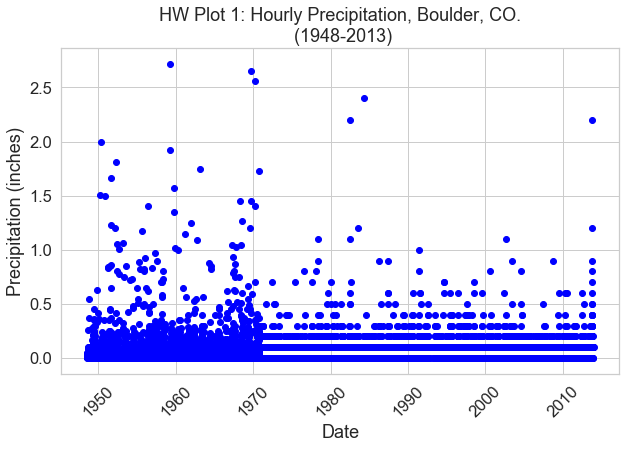

In [50]:
# Plot 1 use the precip_hourly object that you created above
# Add your code to generate this plot here.

# YOUR CODE HERE
# Create the plot space
fig, ax = plt.subplots(figsize = (10,6))

# Add x-axis and y-axis
ax.scatter(data.index.values,
       data['HPCP'].values,
       color='blue', marker = 'o')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title=" HW Plot 1: Hourly Precipitation, Boulder, CO. \n (1948-2013)")
# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)


# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

### DO NOT REMOVE LINE BELOW ###
plot_1_ts = nb.convert_axes(plt, which_axes="current")

In [16]:
# This is where the data will be tested for your plot above. You can skip this cell.

![Colored Bar](colored-bar.png)

### Question (8 points)

1. Consider the plot above and the associated data. What is causing the visual difference in the data that occurs around 1970? 
2. What processing step(s) could you use to address this difference in the data to make the data more similar before and after ~1970?
2. List 2 potential reasons why this change in the data may have occured. 


YOUR ANSWER HERE

![Colored Bar](colored-bar.png)

## Plots 2 & 3 (11 points each)

Using the same data that you used above, create a figure with two side by side subplots. The first plot should be a **scatter plot** of the DAILY precipitation using the DataFrame `precip_daily` that you created above. The second should be a **scatter plot** showing Monthly total precipitation using the `precip_hourly` object. For each plot be sure to do the following:

1. Include an x and y axis label with correct units specified
2. include a title that describes the date range of the data, the location where the data were collected and the variable being displayed.
3. The x axis should display time
4. Using matplotlib `ylim` settings to scale your y axis so both plots are the same. Scale the y axis from 0-20.


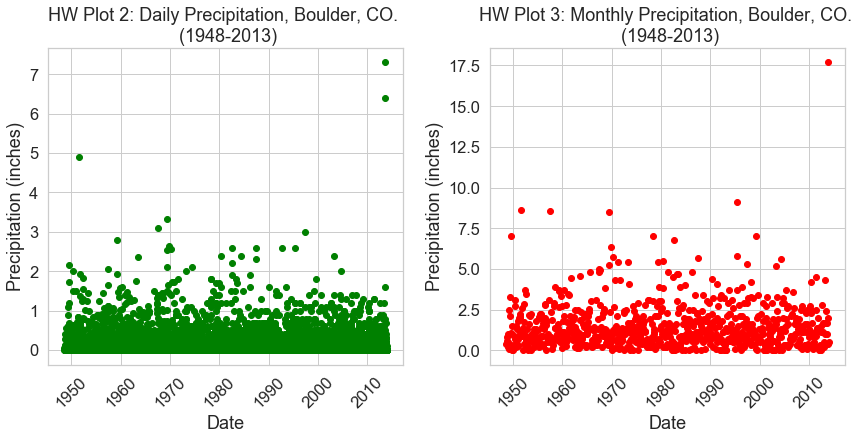

In [17]:
# YOUR CODE HERE
# Define figure space with two horizontal plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6), 
                               constrained_layout=True)

# Add x-axis and y-axis for plot 2 and 3
ax1.scatter(precip_daily.index.values,
       precip_daily['HPCP'],
       color='green', marker = 'o')
ax2.scatter(precip_monthly.index.values,
       precip_monthly['HPCP'],
       color='red', marker = 'o')

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="HW Plot 2: Daily Precipitation, Boulder, CO. \n (1948-2013)")
ax2.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="HW Plot 3: Monthly Precipitation, Boulder, CO. \n (1948-2013)")


# Rotate tick marks on x-axis
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)



### DO NOT REMOVE LINE BELOW ###
plot_2_ts = nb.convert_axes(plt)

In [18]:
# This is where your data will be graded! Ignore this cell

In [19]:
# This will test your plots - ignore

![Colored Bar](colored-bar.png)

## Create a Function That Returns Year of Max Precipitation Value (7 points)
In the cell below, complete the code needed for a function called `calc_max_precip_year` that will subset a Pandas DataFrame and identify the row where a particular column (in this case HPCP) has a max value. The function should return the YEAR associated with the row that has the max value. Year should be of type integer.  

The function should:

1. Take a pandas dataframe and a column name (as a text string) as an input
2. Return a year in a numeric form.

Then run the function to create the following 3 variables:

1. `calculated_year_hourly`
1. `calculated_year_daily`
1. `calculated_year_monthly`


In [27]:
# Write a function that calculates the year during which the max rainfall occured.


def calc_max_precip_year(df, col_name):
    """
    Function that takes a dataframe and calculates the year during which a max event occurred.

    # Add the parameters and returns elements here to fill out your docstring
    Parameters
    ----------
    df : dataframe
         numeric values
    col_name : string
        numeric values
    
    Returns
    ------
    calculated_year_hourly: date
    year with maximum horuly precipitation
    
    calculated_year_daily : date
    year with maximum daily precipitation
    
    calculated_year_monthly : date
    year with maximum monthly precipitation
    """

    # Populate this function with the correct code
    # YOUR CODE HERE
    df_max = df[col_name].idxmax()
    year = df_max.year    
    

    # Test that the function returns an integer value
    try:
        assert isinstance(year, (np.int64, int, float, complex))
    except ValueError:
        print("Oops!  This function should return an integer representing a year.")

    return year

# Here, create the three objects specified in the markdown cell above : 
# 1) calculated_year_hourly, 2) calculated_year_daily, 3) calculated_year_monthly
calculated_year_monthly = calc_max_precip_year(precip_monthly,'HPCP')
calculated_year_daily = calc_max_precip_year(precip_daily,'HPCP')
calculated_year_hourly = calc_max_precip_year(precip_hourly,'HPCP')

# YOUR CODE HERE
print(calculated_year_monthly)
print(calculated_year_daily)
print(calculated_year_hourly)


2013
2013
1959


In [ ]:
# Create two empty lists to receive median and max values
median_ppt_inches = []
max_ppt_inches =[]

# Calculate median for each numpy array and add to new lists
for i in arr_list: 
    arr_median =summary_mm_to_inch(i, stat ='median', axis_value = 0)                 
    median_ppt_inches += [arr_median]
    arr_max = summary_mm_to_inch(i, stat = 'max', axis_value = 1)                 
    max_ppt_inches += [arr_max]
# Save Boulder and San Francisco median precipitation as numpy array 
boulder_mo_med_ppt = median_ppt_inches[0]
sf_mo_med_ppt = median_ppt_inches[1]

# Save Boulder and San Francisco maximum precipitation as numpy array 
boulder_yearly_max_ppt = max_ppt_inches[0]
sf_yearly_max_ppt = max_ppt_inches[1]

# To print meidan array values and their shape
print(boulder_mo_med_ppt)
boulder_mo_med_ppt.shape
print(sf_mo_med_ppt)
sf_mo_med_ppt.shape


## Manually Graded Cell
This is where your docstring will be graded! Be sure that you have a number style docstring with `parameters` and `returns`.

![Colored Bar](colored-bar.png)

### Question (10 Points) 

In the markdown cell below, first answer the following questions

1. In what year did Boulder have the highest hourly precipitation recorded value?
2. In what year did Boulder have the highest daily precipitation recorded value?
3. In what year did Boulder have the highest monthly precipitation recorded value?
4. Consider your answers to the questions above. How could summarizing data at different temporal units (hour, vs month vs year) impact an analysis of rainfall as it contributes to a flood event? (write a short paragraph - 3-5 sentences) that addresses this question.


![Colored Bar](colored-bar.png)

# This is a manually graded cell (12 points)
You can ignore it
1. AutoPep 8 format applied (5 points)
2. Notebook starts at cell [1] and runs without errors (5 points)
3. All imports are listed at the top of the notebook (2 points)